# GRIP @ THE SPARKS FOUNDATION
Data Science And Business Analytics 

### AUTHOR: SHIGHA THERES

### Prediction using Supervised ML
Predicting the percentage of an student based on the number of study hours.

#### Importing all libraries required in this notebook

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Reading data from remote link

In [3]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:
#### Plotting the distribution of scores

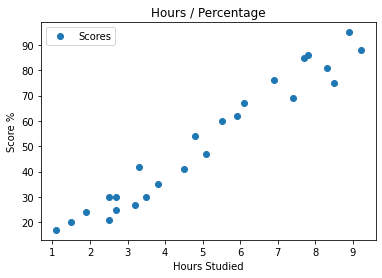

In [4]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours / Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score %')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using **Scikit-Learn's built-in train_test_split() method**:

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Trainined the algorithm.")

Trainined the algorithm.


#### Plotting the regression line


In [8]:
line = regressor.coef_*X+regressor.intercept_

#### Plotting for the test data

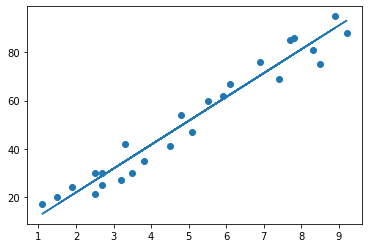

In [9]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [15]:
#Test data in hours
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#Predicting the scores
y_pred = regressor.predict(X_test) 

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
print("\nTraining Score: ", regressor.score(X_train,y_train))
print("Testing Score : ", regressor.score(X_test,y_test))



Training Score:  0.9515510725211552
Testing Score :  0.9454906892105356


#### Bar plot to show actual and predicted value

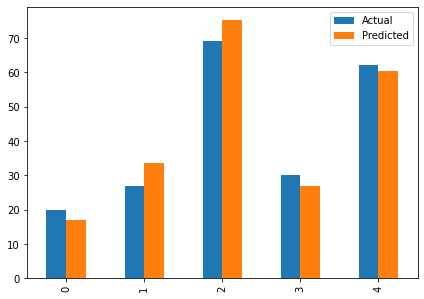

In [31]:
df.plot(kind = 'bar', figsize=(7,5))
plt.show()



###  Predict the score if a student studies for 9.25 hrs/ day

In [46]:
hours= 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)

print ("\nPredicted % score for 9.25 hrs = {} ".format(own_pred[0]))


Predicted % score for 9.25 hrs = 93.69173248737538 


### Evaluating model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [44]:
from sklearn import metrics  

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score:',metrics.explained_variance_score(y_test, y_pred))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Explained Variance Score: 0.9482829156738147
